<a href="https://colab.research.google.com/github/RPAlbuquerque/Data-Science-UFRGS/blob/main/Mobility_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and data upload

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd

#Data upload
path = '/content/drive/MyDrive/Data - ML/export-20231001-20231123.csv'

df = pd.read_csv(path)

#Dataframe overview

In [10]:
#Data visualization
print(df.head())

                 month_part  store_id demographics_gender  \
0  2023-10-01T00:00:00.000Z  kml_2244                   F   
1  2023-10-01T00:00:00.000Z  kml_4311                   M   
2  2023-10-01T00:00:00.000Z   kml_236                   M   
3  2023-10-01T00:00:00.000Z   kml_143                   M   
4  2023-10-01T00:00:00.000Z    kml_33                   F   

  demographics_age_range demographics_class      unique       visits  \
0                  50_59                  D  391.766211  1872.677893   
1                  25_29                  E  120.905618   603.454538   
2                  40_49                  D  576.131598  2966.239889   
3                  30_39                  A   60.398869   263.148494   
4                  60_69                  E  162.437729   945.435139   

   raw_unique  raw_visits   unique_q1  ...   dow_5_h3   dow_5_h4   dow_6_h1  \
0   48.485180   88.040670  102.376651  ...  15.360128  16.187337  10.799090   
1   13.912516   26.582361   28.893742  ...

In [11]:
#Data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364160 entries, 0 to 364159
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   month_part              364160 non-null  object 
 1   store_id                364160 non-null  object 
 2   demographics_gender     364160 non-null  object 
 3   demographics_age_range  364160 non-null  object 
 4   demographics_class      364160 non-null  object 
 5   unique                  364160 non-null  float64
 6   visits                  364160 non-null  float64
 7   raw_unique              364160 non-null  float64
 8   raw_visits              364160 non-null  float64
 9   unique_q1               364160 non-null  float64
 10  visits_q1               364160 non-null  float64
 11  unique_q2               364160 non-null  float64
 12  visits_q2               364160 non-null  float64
 13  unique_q3               364160 non-null  float64
 14  visits_q3           

In [12]:
#Descriptive statistics
print(df.describe())

              unique         visits     raw_unique     raw_visits  \
count  364160.000000  364160.000000  364160.000000  364160.000000   
mean      789.885284    3672.723828      93.365994     167.309948   
std      1962.216049    8815.513214     234.075733     409.583323   
min         0.000000       0.000000       0.000000       0.000000   
25%        79.680042     413.212768       8.968341      17.909122   
50%       267.748705    1367.253169      30.447623      59.733212   
75%       803.056483    3985.464182      92.412051     176.195088   
max    108923.458883  526240.315224   12651.924773   23651.338759   

           unique_q1      visits_q1      unique_q2      visits_q2  \
count  364160.000000  364160.000000  364160.000000  364160.000000   
mean      201.725297     808.035333     250.624653     898.515282   
std       526.463877    2050.457438     632.593546    2159.935456   
min         0.000000       0.000000       0.000000       0.000000   
25%        18.718119      85.0591

#Analysis of the Distribution of Categorical Variables

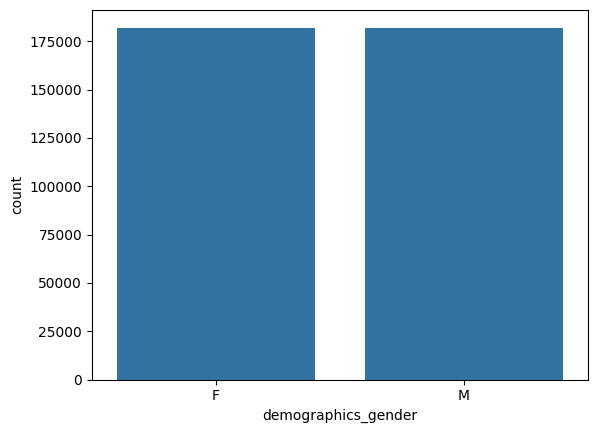

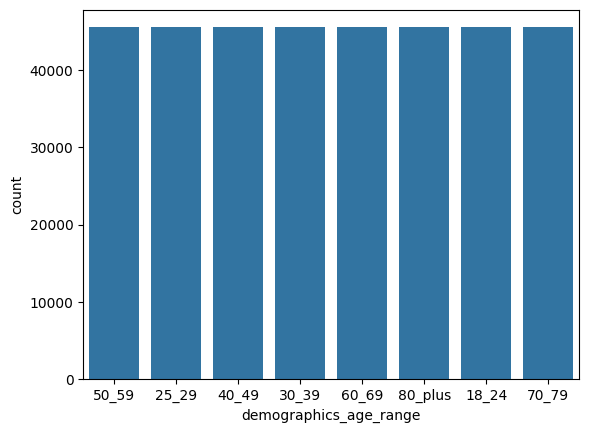

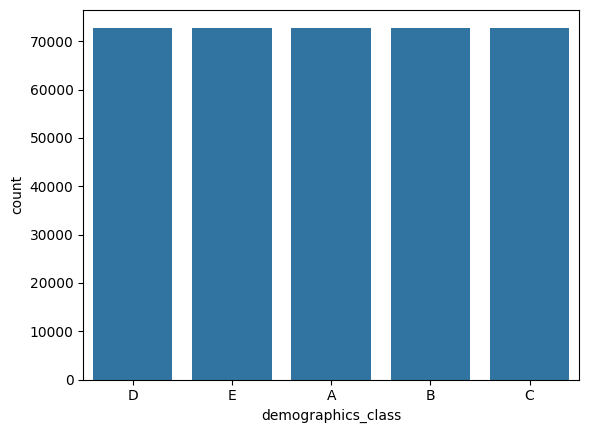

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#Gender distribution
sns.countplot(x='demographics_gender', data=df)
plt.show()

#Age Range Distribution
sns.countplot(x='demographics_age_range', data=df)
plt.show()

#Demographic Class Distribution
sns.countplot(x='demographics_class', data=df)
plt.show()


#Temporal Analysis

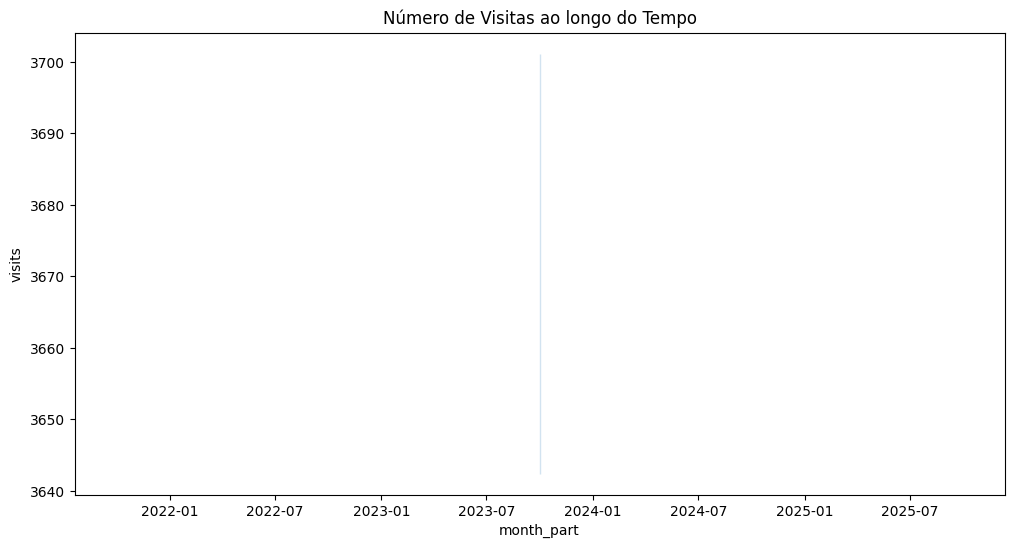

In [15]:
#Convert 'month_part' to date format
df['month_part'] = pd.to_datetime(df['month_part'])

#Line Graph for Number of Visits Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_part', y='visits', data=df)
plt.title('Número de Visitas ao longo do Tempo')
plt.show()


NOTE: All data has the same date; what differs are the weekly visits (q1, q2, q3, and q4)

#Relationship Analysis

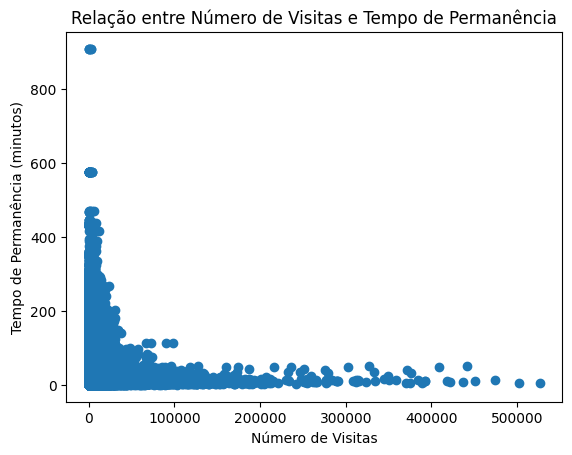

<ipython-input-16-c6d21e7ab90b>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


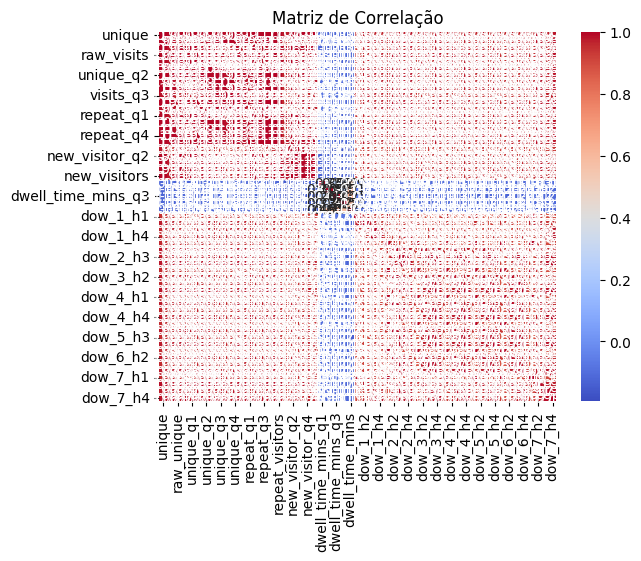

In [16]:
#Scatter plot for Number of Visits vs. Dwell Time
plt.scatter(df['visits'], df['dwell_time_mins'])
plt.xlabel('Número de Visitas')
plt.ylabel('Tempo de Permanência (minutos)')
plt.title('Relação entre Número de Visitas e Tempo de Permanência')
plt.show()

#Correlation between variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


#Analysis of Repeat and New Visitors

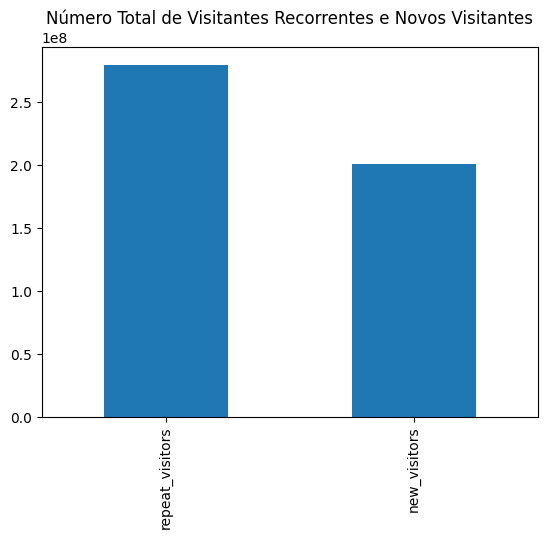

In [17]:
#Bar Chart for Repeat and New Visitors
df[['repeat_visitors', 'new_visitors']].sum().plot(kind='bar')
plt.title('Número Total de Visitantes Recorrentes e Novos Visitantes')
plt.show()


#Box plots

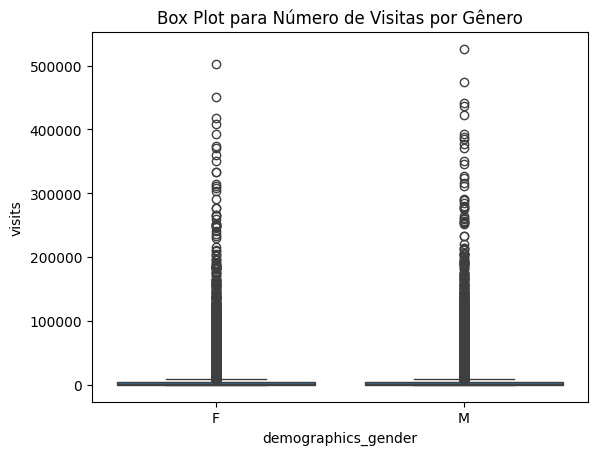

In [18]:
sns.boxplot(x='demographics_gender', y='visits', data=df)
plt.title('Box Plot para Número de Visitas por Gênero')
plt.show()

#Histogram

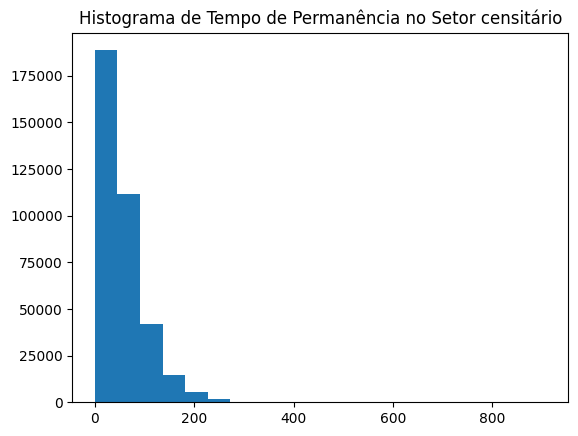

In [20]:
plt.hist(df['dwell_time_mins'], bins=20)
plt.title('Histograma de Tempo de Permanência no Setor censitário')
plt.show()

#Temporal Trends Analysis

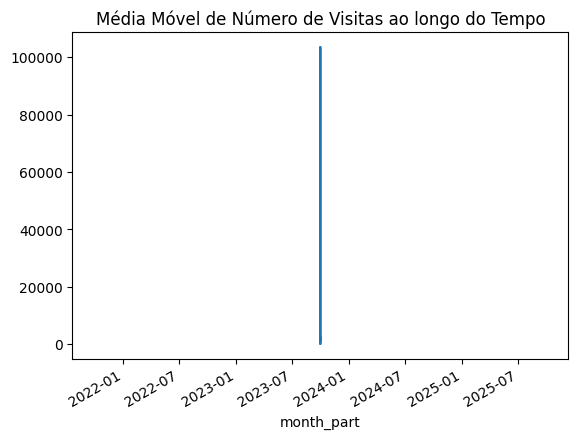

In [21]:
df.set_index('month_part', inplace=True)
df['visits'].rolling(window=7).mean().plot()
plt.title('Média Móvel de Número de Visitas ao longo do Tempo')
plt.show()

NOTE: Data is from the month of October; what differs are the divisions by weeks (q1, q2, q3, and q4).

#Comparison between Groups

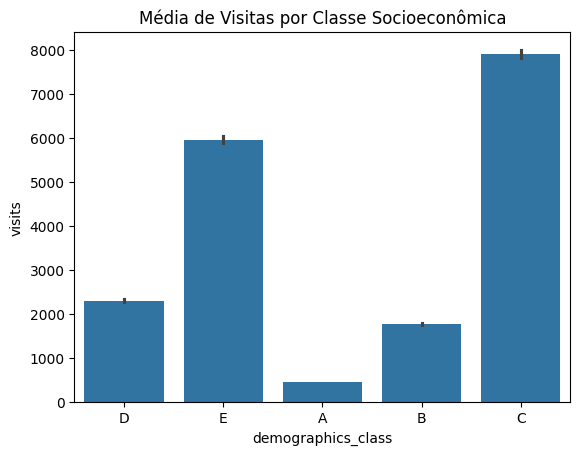

In [22]:
sns.barplot(x='demographics_class', y='visits', data=df)
plt.title('Média de Visitas por Classe Socioeconômica')
plt.show()

#Outliers Analysis

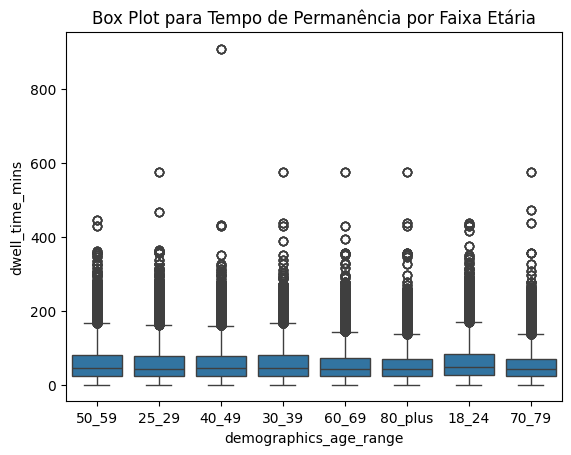

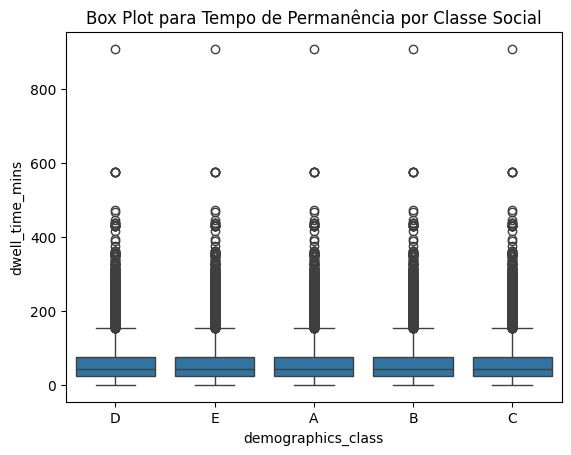

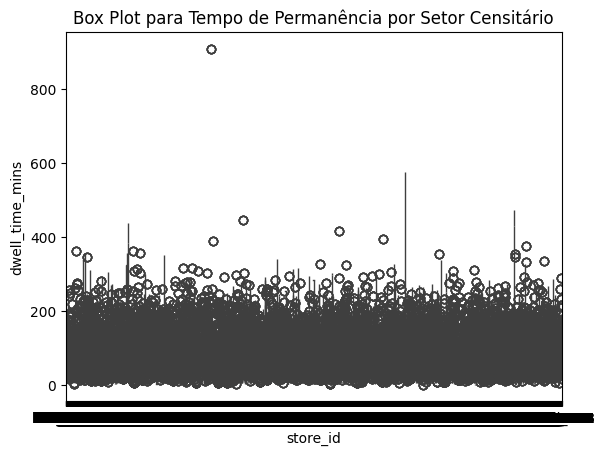

In [26]:
sns.boxplot(x='demographics_age_range', y='dwell_time_mins', data=df)
plt.title('Box Plot para Tempo de Permanência por Faixa Etária')
plt.show()

sns.boxplot(x='demographics_class', y='dwell_time_mins', data=df)
plt.title('Box Plot para Tempo de Permanência por Classe Social')
plt.show()

sns.boxplot(x='store_id', y='dwell_time_mins', data=df)
plt.title('Box Plot para Tempo de Permanência por Setor Censitário')
plt.show()

#Census Tract

In [28]:
num_store_ids = df['store_id'].nunique()
print(f'The number of different census tracts is: {num_store_ids}')

The number of different census tracts is: 4552


Distribution of Visits by Census Tract:

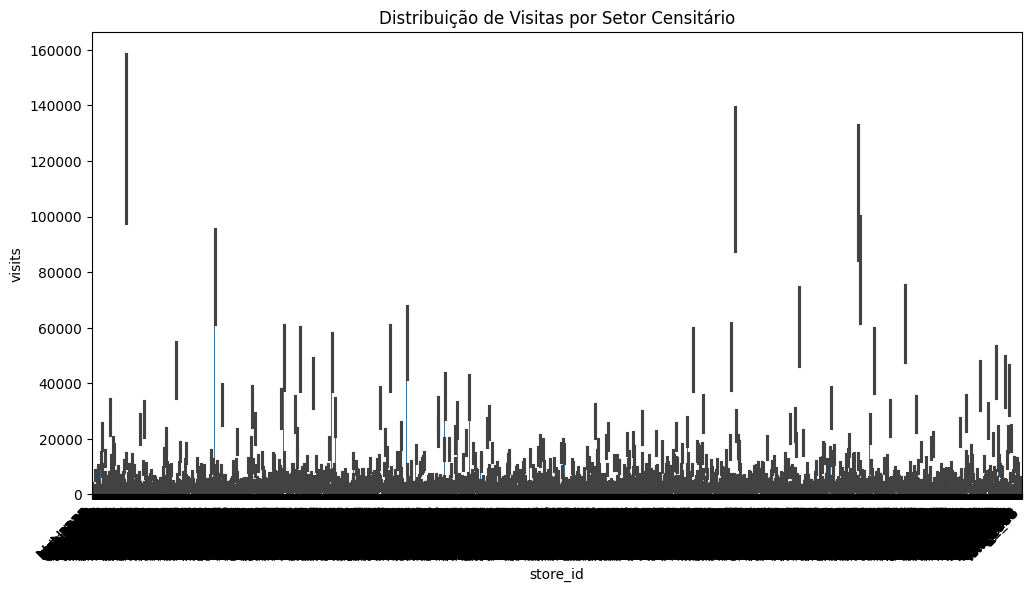

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='store_id', y='visits', data=df)
plt.title('Distribuição de Visitas por Setor Censitário')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

Analysis of Dwell Time by Census Tract

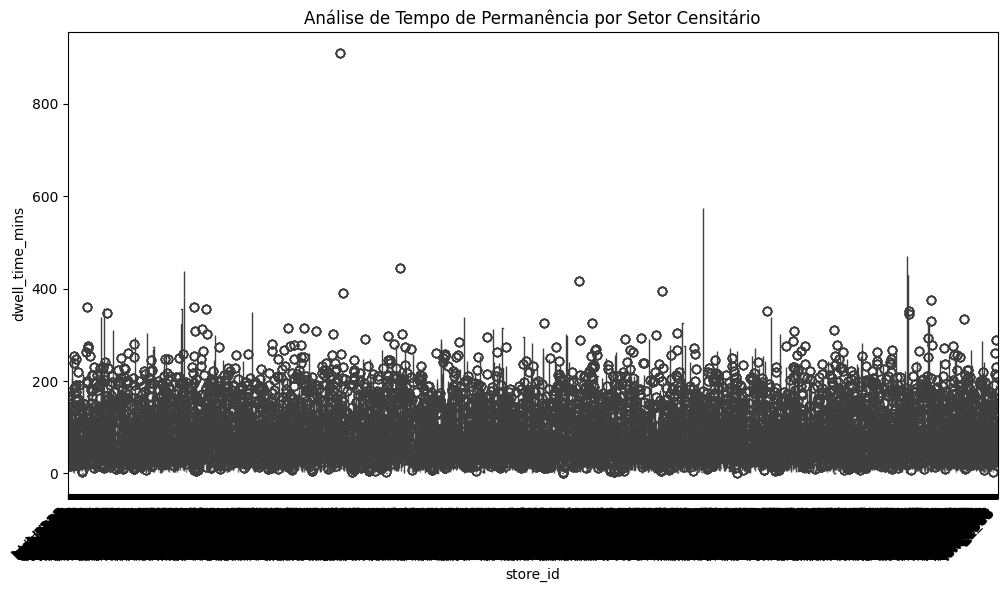

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='store_id', y='dwell_time_mins', data=df)
plt.title('Análise de Tempo de Permanência por Setor Censitário')
plt.xticks(rotation=45, ha='right')
plt.show()

Comparison of Repeat Visitors by Census Tract

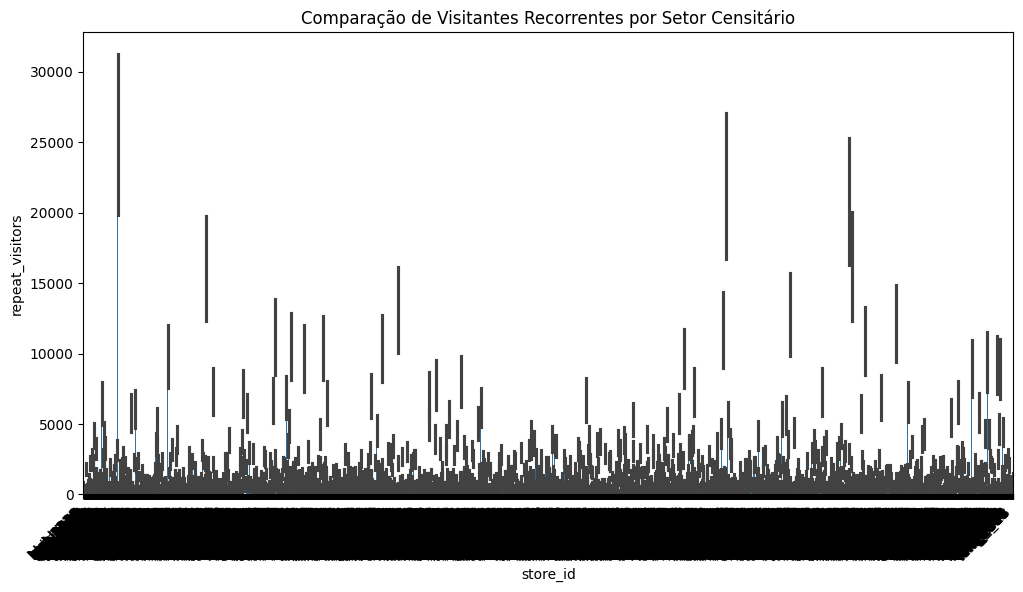

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='store_id', y='repeat_visitors', data=df)
plt.title('Comparação de Visitantes Recorrentes por Setor Censitário')
plt.xticks(rotation=45, ha='right')
plt.show()